We analyze PSP...

In [1]:
import os
import numpy as np
import pandas as pd
from neuro_dmt.analysis.reporting import CircuitProvenance
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.simulation\
    .psp_callibration import\
        PathwaySimulation,\
        TraceCollection,\
        ModelSimulationPSP,\
        PspTraceAnalysis,\
        PspAmplitudeAnalysis,\
        Adapter

In [2]:
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
pspsim =\
    ModelSimulationPSP(
        path_simulation_data=os.path.join(
             proj_sscx_diss,
             "validation",
             "psp-validation"),
         provenance=CircuitProvenance(
            label="SSCxRatDisseminationBioM",
            authors=["BBP Team"],
            date_release="20191212",
            uri=path_bio_m,
            animal="Wistar Rat",
            age="P14 Weeks",
            brain_region="SSCx"))

In [3]:
adapter =\
    Adapter()
pathways =\
    adapter.get_pathways(pspsim)
reference_data =\
    pd.concat([
        pd.DataFrame(
            [[pspsim.simulation_data(p).reference.psp_amplitude["mean"],
             pspsim.simulation_data(p).reference.psp_amplitude["std"]]],
            columns=pd.MultiIndex.from_tuples([
                ("psp_amplitude", "mean"), ("psp_amplitude", "std")]))\
          .assign(pathway=p)
        for p in pathways]).set_index("pathway")
analysis_pspamps =\
    PspAmplitudeAnalysis(
        reference_data=reference_data)

In [4]:
analysis_pspamps(pspsim, adapter)

100%|██████████| 20/20 [00:00<00:00, 31.13it/s]


AttributeError: module 'dmt.data.observation.measurement' has no attribute 'groupby'

In [4]:
measurement_pspamps =\
    analysis_pspamps.get_measurement(
        pspsim, adapter)

100%|██████████| 20/20 [00:00<00:00, 32.11it/s]


In [5]:
measurement_pspamps["data"].head()

psp_amplitude
dataset                  pathway      trial               
SSCxRatDisseminationBioM L6_TPC-L6_BC 0.0         2.646888
                                      1.0         1.333252
                                      2.0         0.000278
                                      3.0         0.456588
                                      4.0         0.998737

In [9]:
df = measurement_pspamps["data"]
df.groupby(["pathway"]).agg(["size", "mean", "std"])

psp_amplitude                    
                            size      mean       std
pathway                                             
L23_BC-L23_PC                 40  1.447915  1.143418
L23_LBC-L23_PC                40  1.635650  1.618986
L23_NBC-L23_PC                40  1.358363  1.286045
L23_NBC_LBC-L23_PC            40  1.380558  0.928039
L23_PC-L23_PC                 40  0.553775  0.405373
L4_EXC-L4_EXC                 40  1.642764  1.106569
L4_SS-L23_PC                  40  0.730152  0.572975
L5_MC-L5_TTPC                 40  1.222627  1.009154
L5_PC-L5_BC                   40  2.416373  2.963676
L5_STPC-L5_STPC               40  0.635874  0.755823
L5_TTPC-L5_MC                 40  0.326737  0.321999
L5_TTPC-L5_TTPC               40  1.509859  1.255106
L6_IPC-L6_BC                  40  2.048705  1.326924
L6_IPC-L6_BPC                 40  1.211020  0.759909
L6_IPC-L6_IPC                 40  1.333956  0.987617
L6_IPC-L6_MC                  40  0.181981  0.164539
L6_TPC-L6_BC                  40  2.217992  1.424933
L6_TPC-L6_BPC                 40  0.802506  0.868518
L6_TPC-L6_MC                  40  0.204472  0.230584
L6_TPC-L6_TPC                 40  1.147833  1.001424

In [13]:
from dmt.data.observation import measurement
measurement.concat_as_samples({
    "reference": reference_data,
    "model": df})

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/dmt/data/observation/measurement/__init__.py:521: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  for dataset, dataframe in data.items()])


,dataset,pathway,psp_amplitude,trial
0,reference,L6_TPC-L6_BC,11.199612,NaN
1,reference,L6_TPC-L6_BC,2.100112,NaN
2,reference,L6_TPC-L6_BC,-0.580036,NaN
3,reference,L6_TPC-L6_BC,4.822053,NaN
4,reference,L6_TPC-L6_BC,3.223284,NaN
5,reference,L6_TPC-L6_BC,4.506027,NaN
6,reference,L6_TPC-L6_BC,3.456117,NaN
7,reference,L6_TPC-L6_BC,13.020383,NaN
8,reference,L6_TPC-L6_BC,0.504310,NaN
9,reference,L6_TPC-L6_BC,-1.074674,NaN


In [10]:
print(df.head())
plotting_data =\
    analysis_pspamps._with_reference_data(
        measurement_pspamps[adapter.get_label(pspsim)],
        reference_data=reference_data)

                                             psp_amplitude
dataset                  pathway      trial               
SSCxRatDisseminationBioM L6_TPC-L6_BC 0.0         2.646888
                                      1.0         1.333252
                                      2.0         0.000278
                                      3.0         0.456588
                                      4.0         0.998737


KeyError: 'SSCxRatDisseminationBioM'

In [10]:
plotting_data["BlueBrainCircuitModel"].head()

psp_amplitude                    
                            size      mean       std
pathway                                             
L23_BC-L23_PC                 40  1.447915  1.143418
L23_LBC-L23_PC                40  1.635650  1.618986
L23_NBC-L23_PC                40  1.358363  1.286045
L23_NBC_LBC-L23_PC            40  1.380558  0.928039
L23_PC-L23_PC                 40  0.553775  0.405373

In [11]:
measurement.concat_as_summaries(plotting_data).head()

psp_amplitude                
                                                  mean  size       std
dataset               pathway                                         
BlueBrainCircuitModel L23_BC-L23_PC           1.447915  40.0  1.143418
                      L23_LBC-L23_PC          1.635650  40.0  1.618986
                      L23_NBC-L23_PC          1.358363  40.0  1.286045
                      L23_NBC_LBC-L23_PC      1.380558  40.0  0.928039
                      L23_PC-L23_PC           0.553775  40.0  0.405373

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


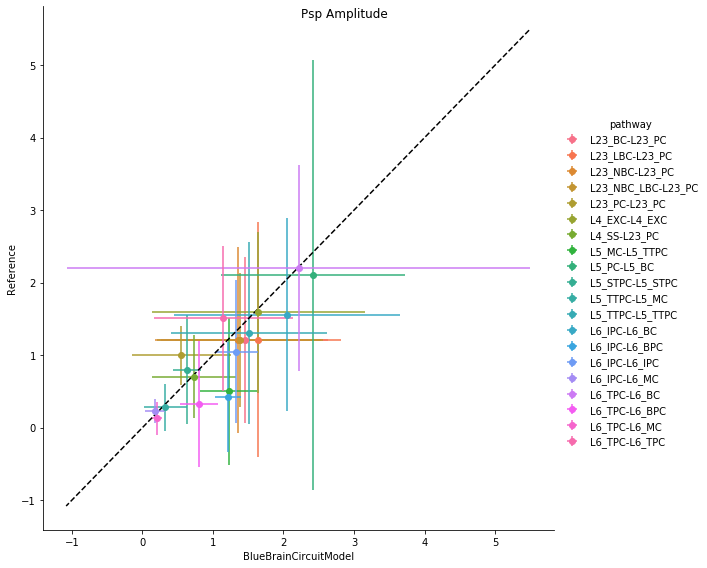

In [12]:
from dmt.data.observation import measurement
from dmt.tk.plotting.crosses import Crosses

crosses =\
    Crosses(
        xvar=adapter.get_label(pspsim),
        yvar=list(reference_data.keys())[0],
        gvar="pathway")
crosses(
    measurement.concat_as_summaries(plotting_data))

In [21]:
list(plotting_data.keys())[0]

'BlueBrainCircuitModel'

In [28]:
df = measurement_pspamps["data"]
df.columns.values[1]

('psp_amplitude', 'mean')

In [46]:
dataframe =\
    measurement.concat_as_summaries(plotting_data)
phenomenon =\
    crosses._get_phenomenon(dataframe)
print(phenomenon)
dataframe_x =\
    dataframe.xs(crosses.xvar, level="dataset")[phenomenon][["mean", "std"]]\
             .dropna()
dataframe_y =\
    dataframe.xs(crosses.yvar, level="dataset")[phenomenon][["mean", "std"]]\
             .dropna()
print(dataframe_x.shape)
print(dataframe_y.shape)

psp_amplitude
(20, 2)
(20, 2)


In [48]:
dataframe_y.reindex(dataframe_x.index)

,mean,std
pathway,,
L23_BC-L23_PC,1.21,1.18
L23_LBC-L23_PC,1.21,1.18
L23_NBC-L23_PC,1.21,1.18
L23_NBC_LBC-L23_PC,1.21,1.18
L23_PC-L23_PC,1.00,0.70
L4_EXC-L4_EXC,1.59,1.51
L4_SS-L23_PC,0.70,0.60
L5_MC-L5_TTPC,0.50,0.40
L5_PC-L5_BC,2.10,1.30


In [49]:
dataframe_x

,mean,std
pathway,,
L23_BC-L23_PC,1.447915,1.143418
L23_LBC-L23_PC,1.635650,1.618986
L23_NBC-L23_PC,1.358363,1.286045
L23_NBC_LBC-L23_PC,1.380558,0.928039
L23_PC-L23_PC,0.553775,0.405373
L4_EXC-L4_EXC,1.642764,1.106569
L4_SS-L23_PC,0.730152,0.572975
L5_MC-L5_TTPC,1.222627,1.009154
L5_PC-L5_BC,2.416373,2.963676
